# Dizüstü Bilgisayar Fiyatı Tahmini Etme

In [2]:
# Bu çalışmamızda özelliklerine dizüstü bilgisayarların fiyatını tahmin etmeyi sağlaya programı yazacağız
# Data Exploration: Dizüstü bilgisayar özellikleri ile fiyatlar arasındaki korelasyon analiz edilecek. 
# Feature Engineering: 'TouchScreen' ve 'IPS Display' gibi yeni özellikler oluşturulacak
# Preprocessing: Eksik değerleri ele aldı, veri türlerini dönüştürdü ve veri kümesini temizledi. 
# Model Building: Linear Regression, Decision Tree Regressor, Random Forest Regressor, AdaBoost Regressor, and XGBoost Regressor dahil olmak üzere kullanılan regresyon modelleri.
# Model Evaluation: Mean Squared Error, Mean Absolute Error, ve R-squared gibi ölçümler kullanılarak değerlendirilen modeller.
# Hyperparameter Tuning: GridSearchCV kullanılarak Random Forest Regressor optimize etti.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore') 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# <font color=lime> HAYELLER

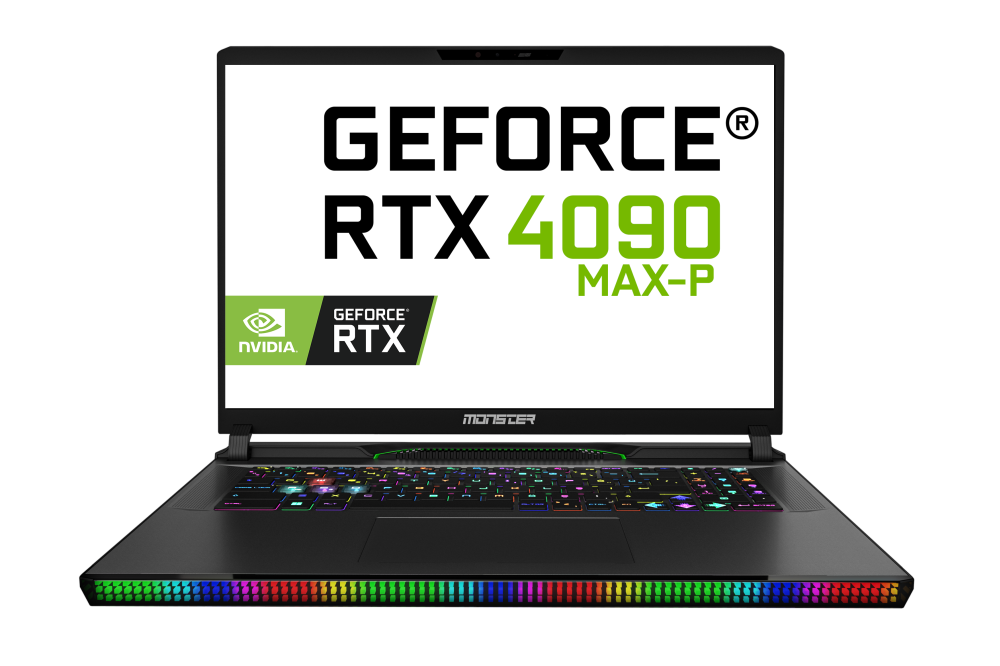

# <font color=red> GERÇEKLER

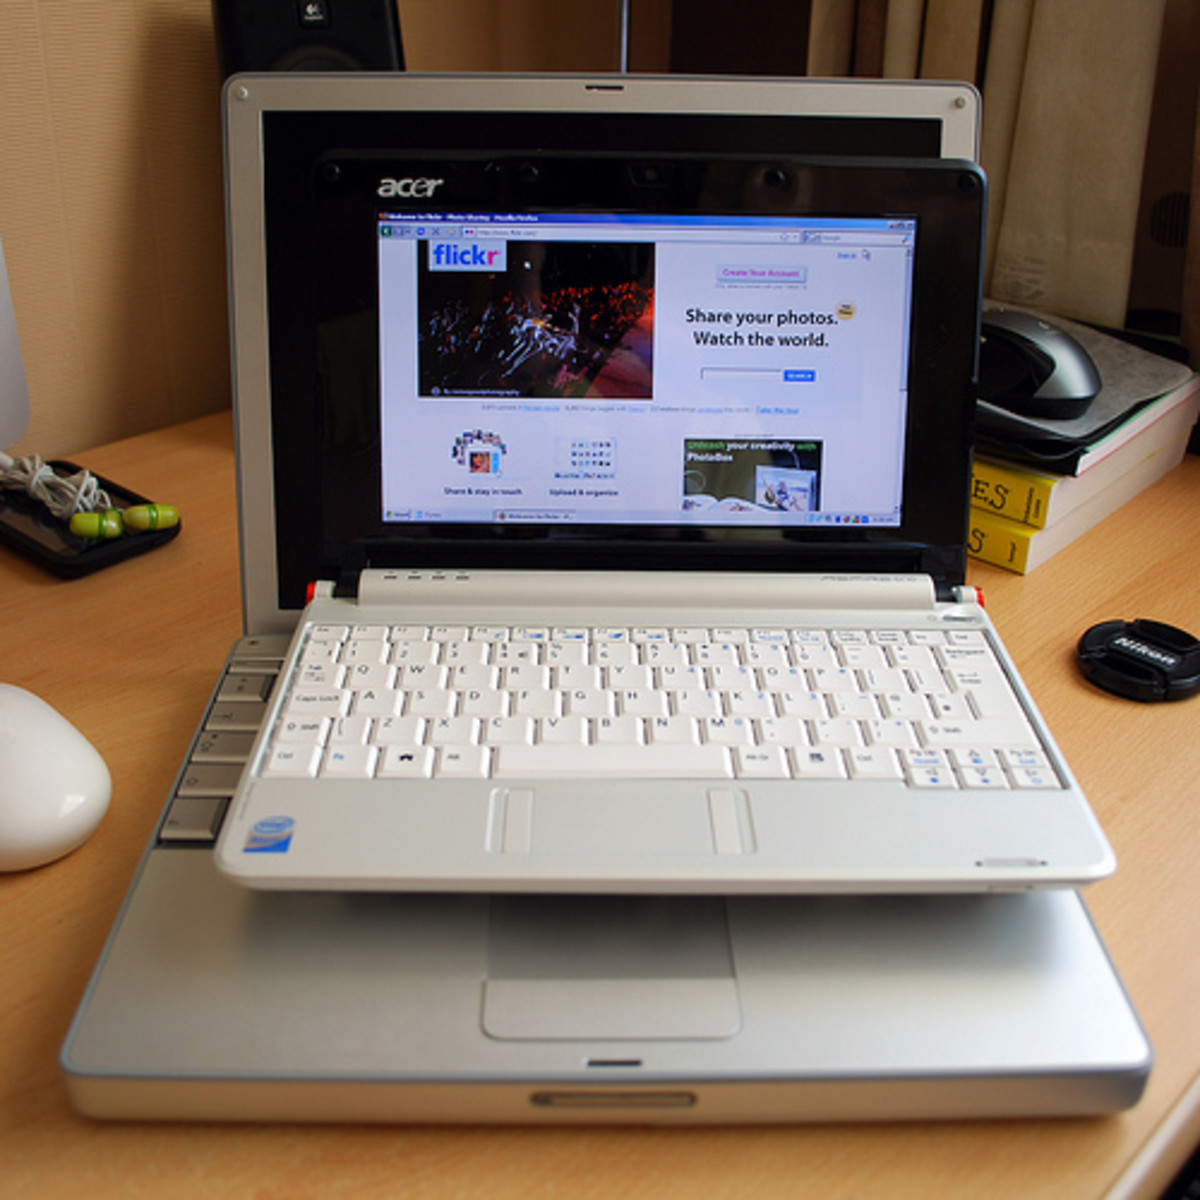

### EDA - Exploratory Data Analysis - Keşfedici Veri Ananizi

In [9]:
df=pd.read_csv('laptop_data.csv')

In [10]:
df.head()

Unnamed: 0 Company   TypeName  Inches                    ScreenResolution  \
0           0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1           1   Apple  Ultrabook    13.3                            1440x900   
2           2      HP   Notebook    15.6                   Full HD 1920x1080   
3           3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4           4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

In [11]:
df.sample(5)

Unnamed: 0    Company            TypeName  Inches  \
596         596     Lenovo  2 in 1 Convertible    13.3   
686         686         HP            Notebook    15.6   
592         592       Dell  2 in 1 Convertible    11.6   
640         640     Lenovo              Gaming    15.6   
104         104  Microsoft           Ultrabook    13.5   

                              ScreenResolution                          Cpu  \
596  IPS Panel Full HD / Touchscreen 1920x1080   Intel Core i7 7500U 2.7GHz   
686                                   1366x768   Intel Core i5 7200U 2.5GHz   
592                       Touchscreen 1366x768     Intel Core M 7Y30 1.0GHz   
640                IPS Panel Full HD 1920x1080  Intel Core i7 7700HQ 2.8GHz   
104                      Touchscreen 2256x1504   Intel Core i5 7200U 2.5GHz   

     Ram                Memory                       Gpu         OpSys  \
596  8GB             512GB SSD     Intel HD Graphics 620    Windows 10   
686  4GB             500GB HDD            AMD Radeon 520    Windows 10   
592  4GB             128GB SSD     Intel HD Graphics 615    Windows 10   
640  8GB  128GB SSD +  1TB HDD  Nvidia GeForce GTX 1050M    Windows 10   
104  8GB             256GB SSD     Intel HD Graphics 620  Windows 10 S   

      Weight        Price  
596   1.37kg  107892.0000  
686   1.86kg   32639.8608  
592   1.39kg   32127.8400  
640    2.5kg   59087.5200  
104  1.252kg   71395.2000

In [12]:
df.tail()

Unnamed: 0 Company            TypeName  Inches  \
1298        1298  Lenovo  2 in 1 Convertible    14.0   
1299        1299  Lenovo  2 in 1 Convertible    13.3   
1300        1300  Lenovo            Notebook    14.0   
1301        1301      HP            Notebook    15.6   
1302        1302    Asus            Notebook    15.6   

                                ScreenResolution  \
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu   Ram              Memory  \
1298            Intel Core i7 6500U 2.5GHz   4GB           128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16GB           512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2GB  64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6GB             1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4GB           500GB HDD   

                        Gpu       OpSys  Weight     Price  
1298  Intel HD Graphics 520  Windows 10   1.8kg  33992.64  
1299  Intel HD Graphics 520  Windows 10   1.3kg  79866.72  
1300      Intel HD Graphics  Windows 10   1.5kg  12201.12  
1301     AMD Radeon R5 M330  Windows 10  2.19kg  40705.92  
1302      Intel HD Graphics  Windows 10   2.2kg  19660.32

In [13]:
df.shape

(1303, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [15]:
df.describe()

Unnamed: 0       Inches          Price
count  1303.00000  1303.000000    1303.000000
mean    651.00000    15.017191   59870.042910
std     376.28801     1.426304   37243.201786
min       0.00000    10.100000    9270.720000
25%     325.50000    14.000000   31914.720000
50%     651.00000    15.600000   52054.560000
75%     976.50000    15.600000   79274.246400
max    1302.00000    18.400000  324954.720000

In [16]:
df.isnull().sum().sort_values(ascending=False)

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [17]:
df.corr(numeric_only=True)

Unnamed: 0    Inches     Price
Unnamed: 0    1.000000 -0.087936  0.067984
Inches       -0.087936  1.000000  0.068197
Price         0.067984  0.068197  1.000000

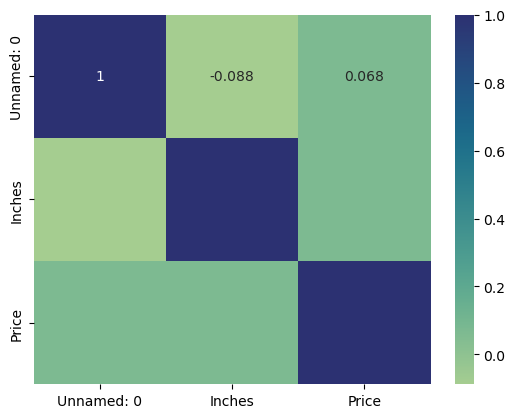

In [18]:
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='crest');

In [19]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

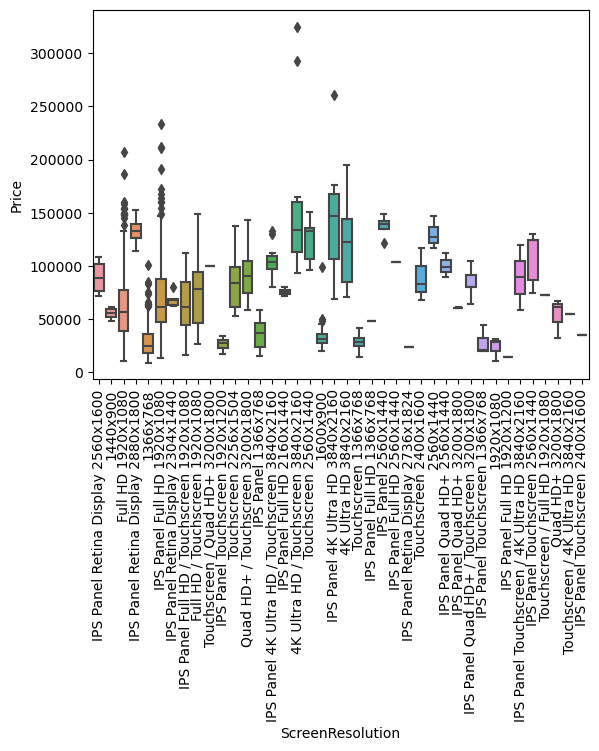

In [20]:
sns.boxplot(x='ScreenResolution',y='Price',data=df)
plt.xticks(rotation=90);

In [21]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

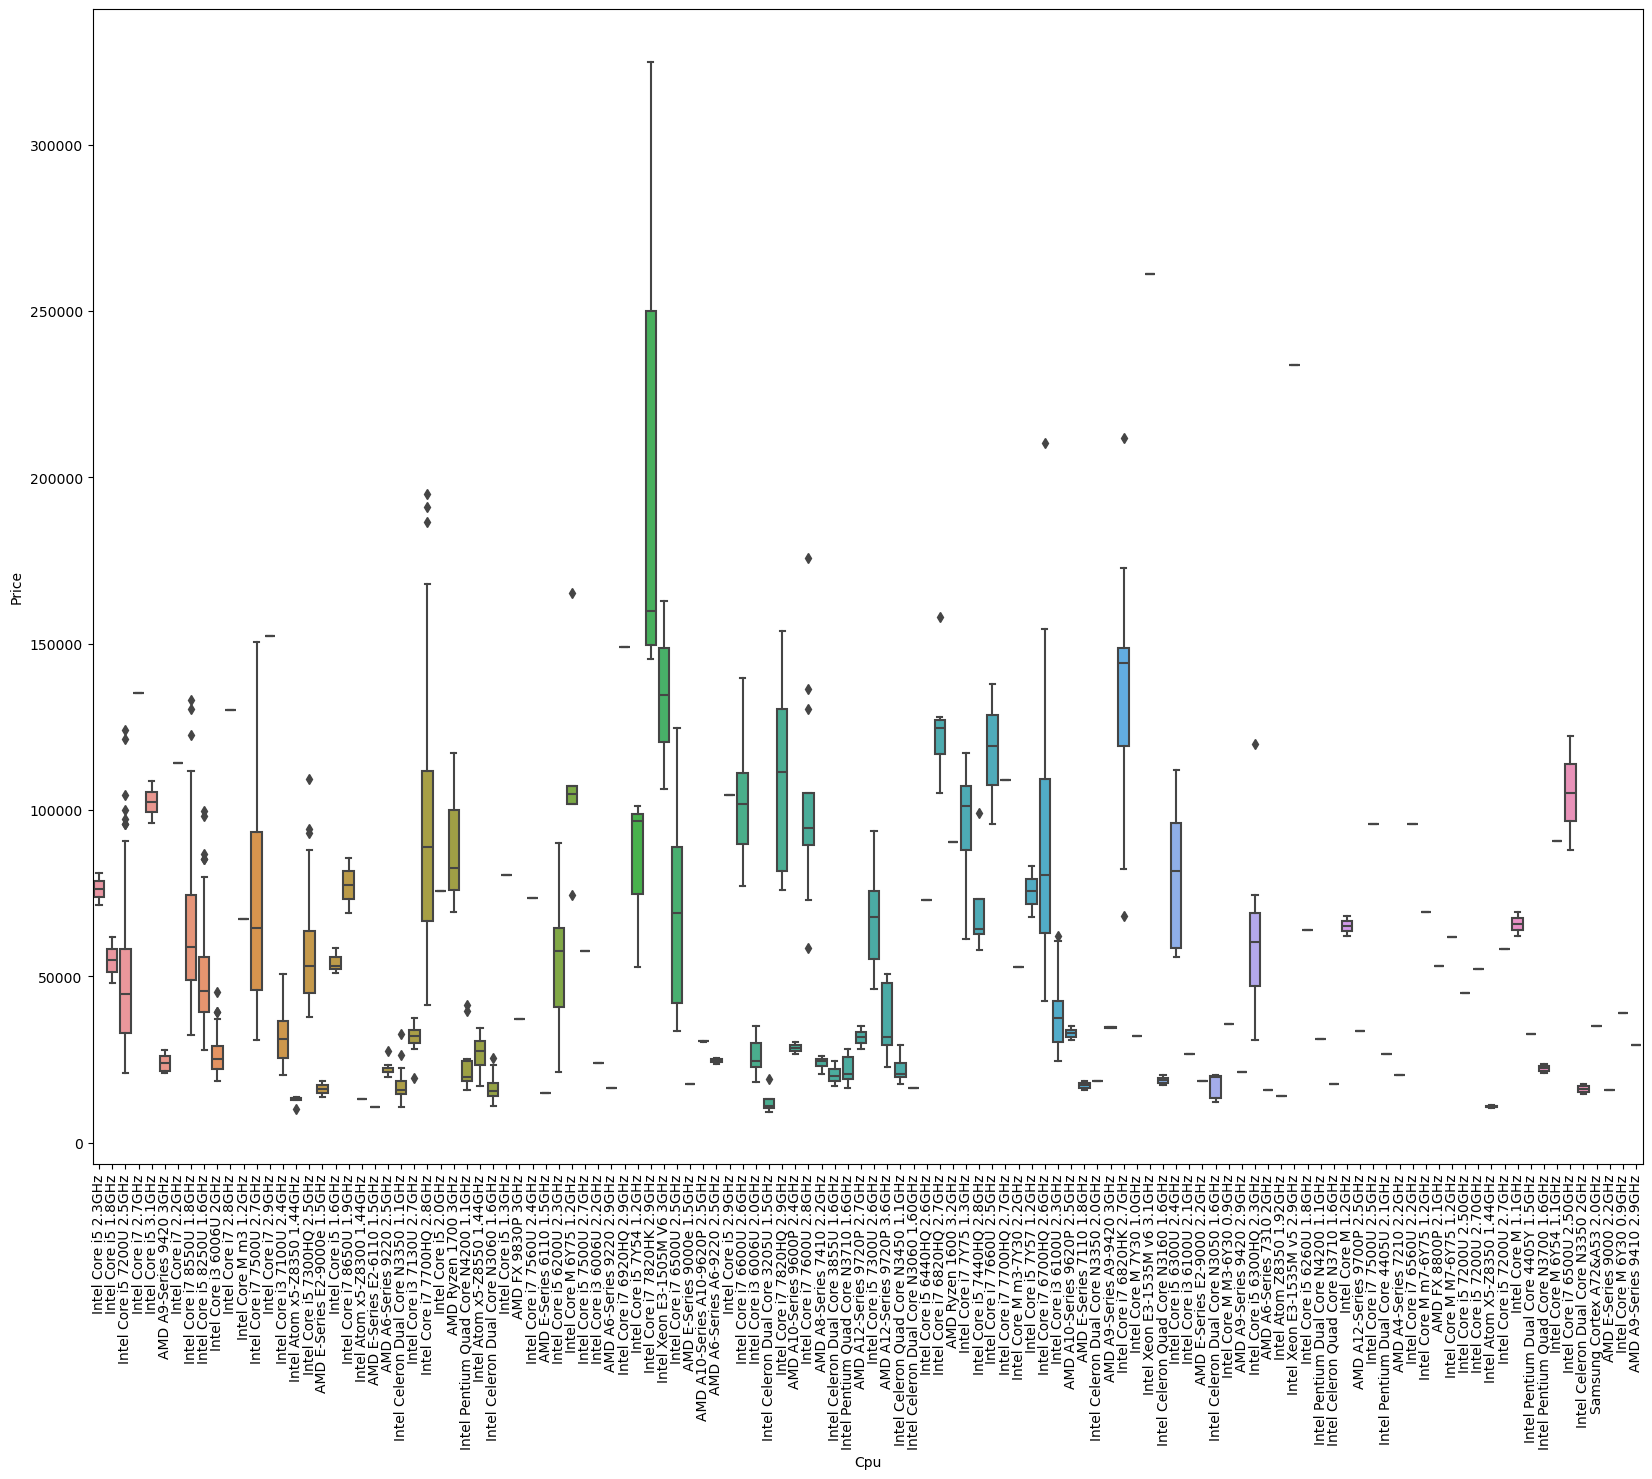

In [22]:
plt.figure(figsize=(20,15))
sns.boxplot(x='Cpu',y='Price',data=df)
plt.xticks(rotation=90);

In [23]:
df['Ram'].value_counts()

Ram
8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: count, dtype: int64

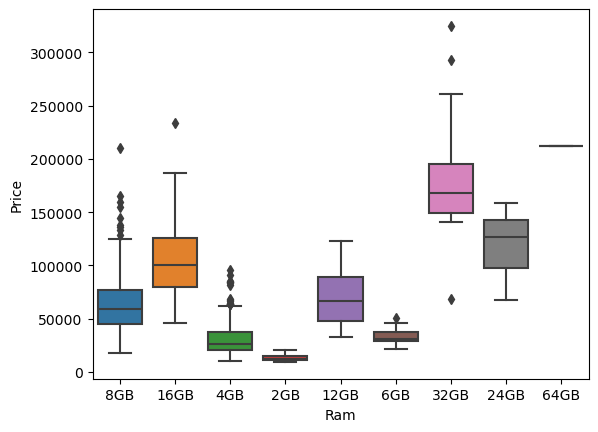

In [24]:
sns.boxplot(x='Ram',y='Price',data=df);

In [25]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

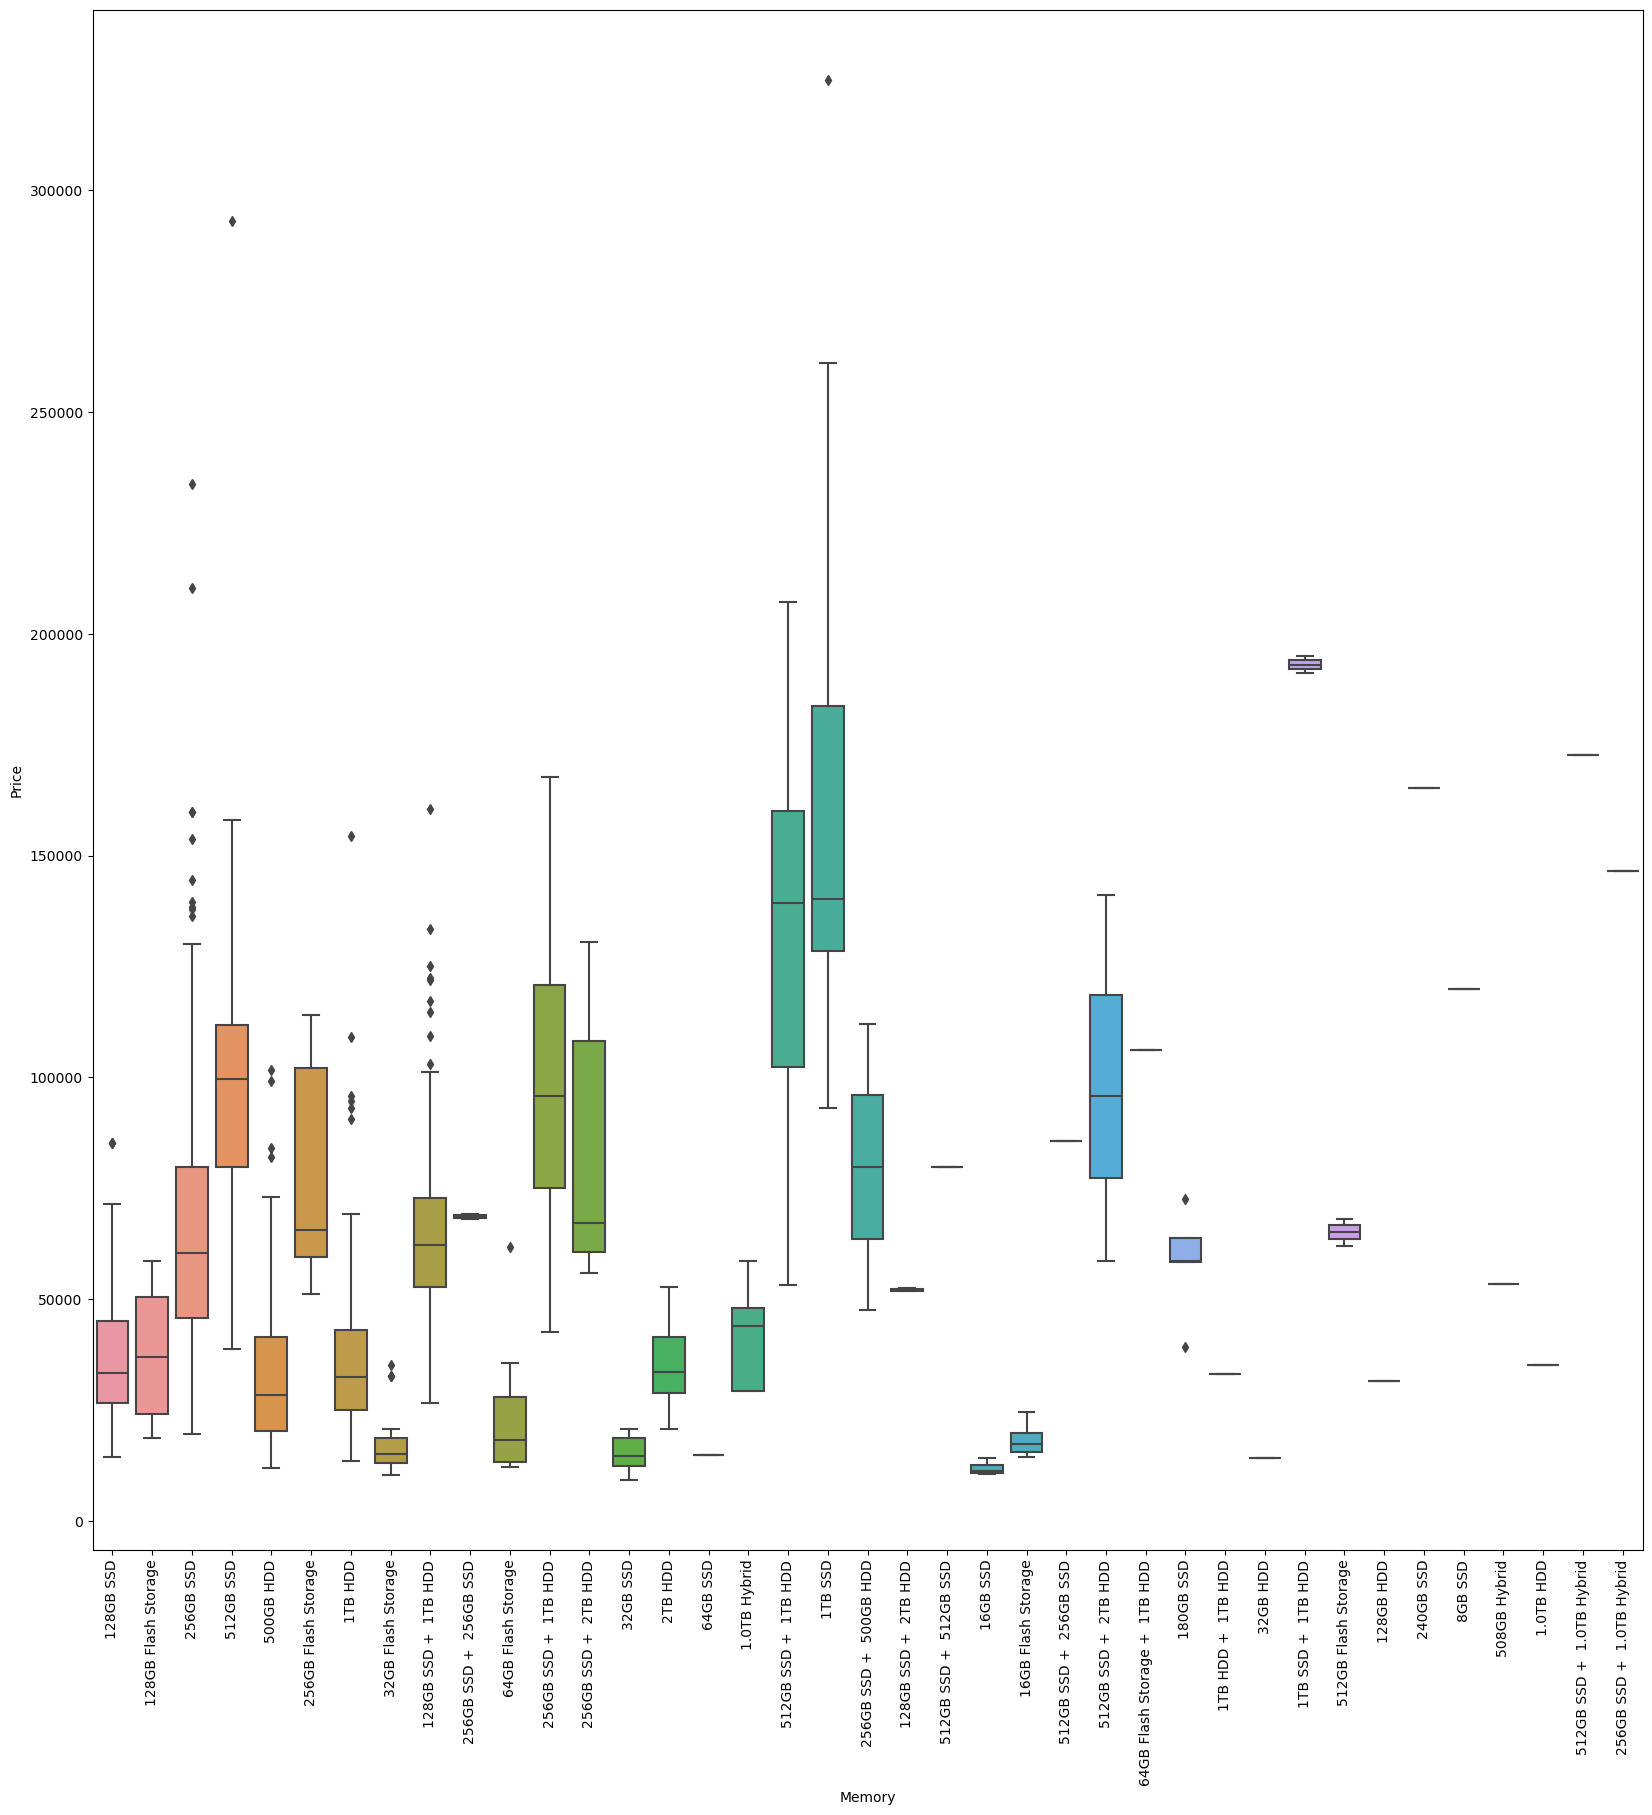

In [26]:
plt.figure(figsize=(20,20))
sns.boxplot(x='Memory',y='Price',data=df)
plt.xticks(rotation=90);

In [27]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

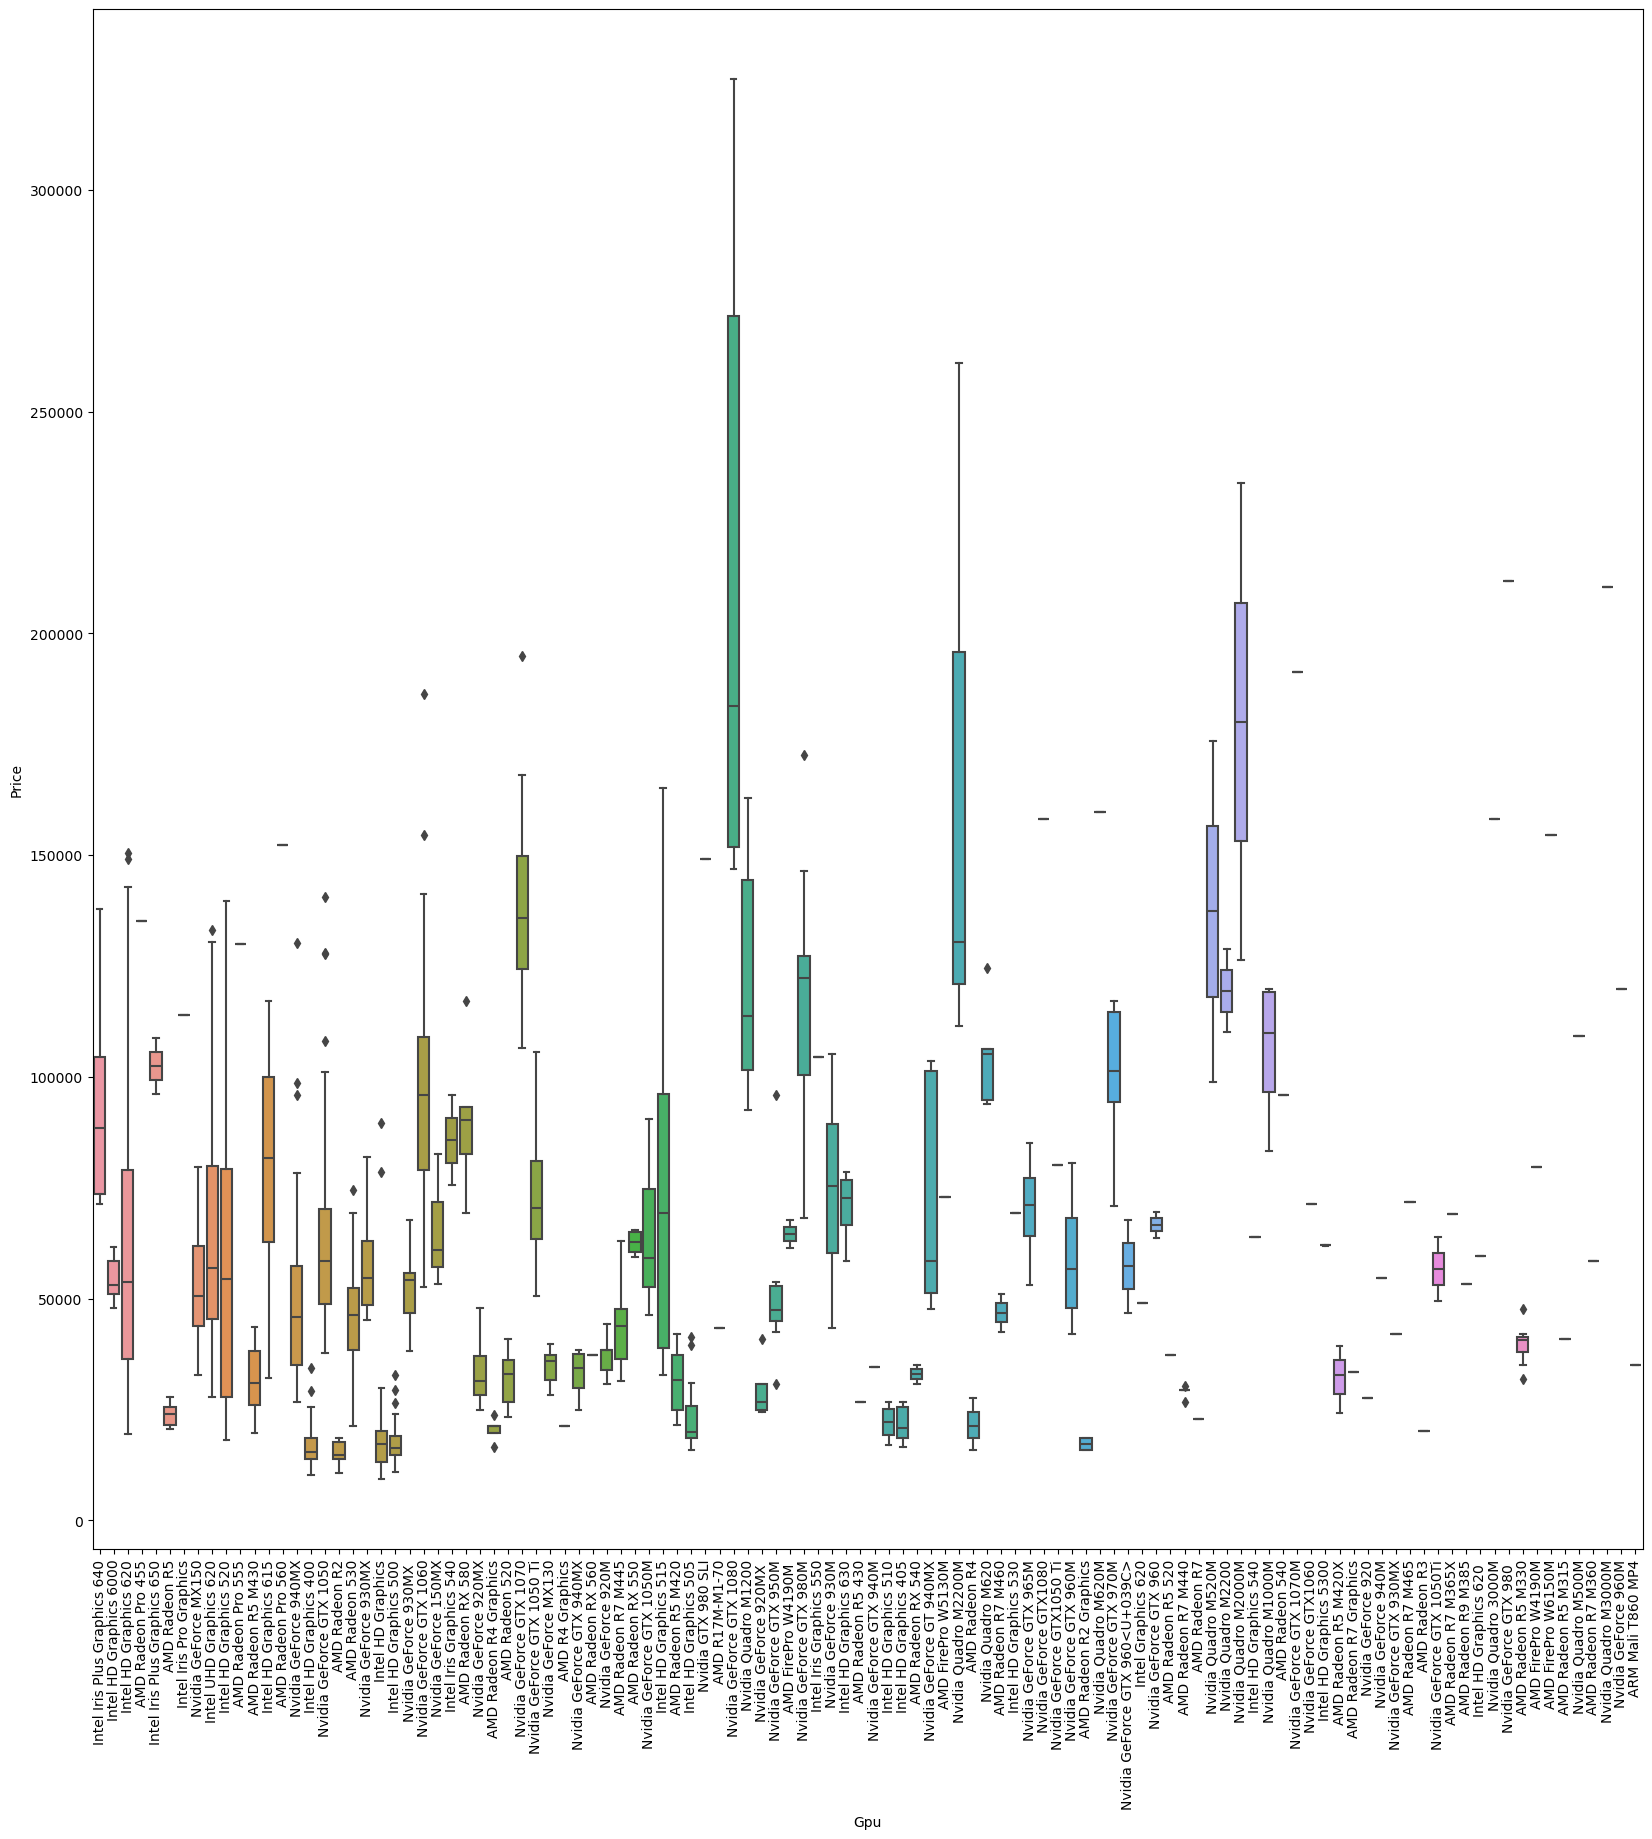

In [28]:
plt.figure(figsize=(20,20))
sns.boxplot(x='Gpu',y='Price',data=df);
plt.xticks(rotation=90);

### Feature Engineering = Özellik Mühendisliği

In [30]:
df=df.drop(['Unnamed: 0'],axis=1)

In [31]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [33]:
df2=df

#### <font color=blue> Burada ScreenResolution ayıklama işlemi yaptık

In [35]:
df2['SR_Touchscreen']=df['ScreenResolution'].str.contains('Touchscreen').astype(int)
df2['SR_IPS']=df['ScreenResolution'].str.contains('IPS').astype(int)

In [36]:
df2['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [37]:
resolution=df2['ScreenResolution'].str.split('x',n=1,expand=True)

In [38]:
df2['X_resolution']=resolution[0]
df2['Y_resolution']=resolution[1]

In [39]:
df2.head(3)

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz  8GB            128GB SSD   
1        Intel Core i5 1.8GHz  8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz  8GB            256GB SSD   

                            Gpu  OpSys  Weight       Price  SR_Touchscreen  \
0  Intel Iris Plus Graphics 640  macOS  1.37kg  71378.6832               0   
1        Intel HD Graphics 6000  macOS  1.34kg  47895.5232               0   
2         Intel HD Graphics 620  No OS  1.86kg  30636.0000               0   

   SR_IPS                   X_resolution Y_resolution  
0       1  IPS Panel Retina Display 2560         1600  
1       0                           1440          900  
2       0                   Full HD 1920         1080

In [40]:
df2['X_resolution']=df2['X_resolution'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [41]:
df2['X_resolution']=df2['X_resolution'].astype('int')
df2['Y_resolution']=df2['Y_resolution'].astype('int')

In [42]:
df2['PPI']=(((df2['X_resolution']**2+df2['Y_resolution']**2))**0.5/df2['Inches']).astype('float')

In [43]:
df2=df2.drop(['X_resolution','Y_resolution'],axis=1)

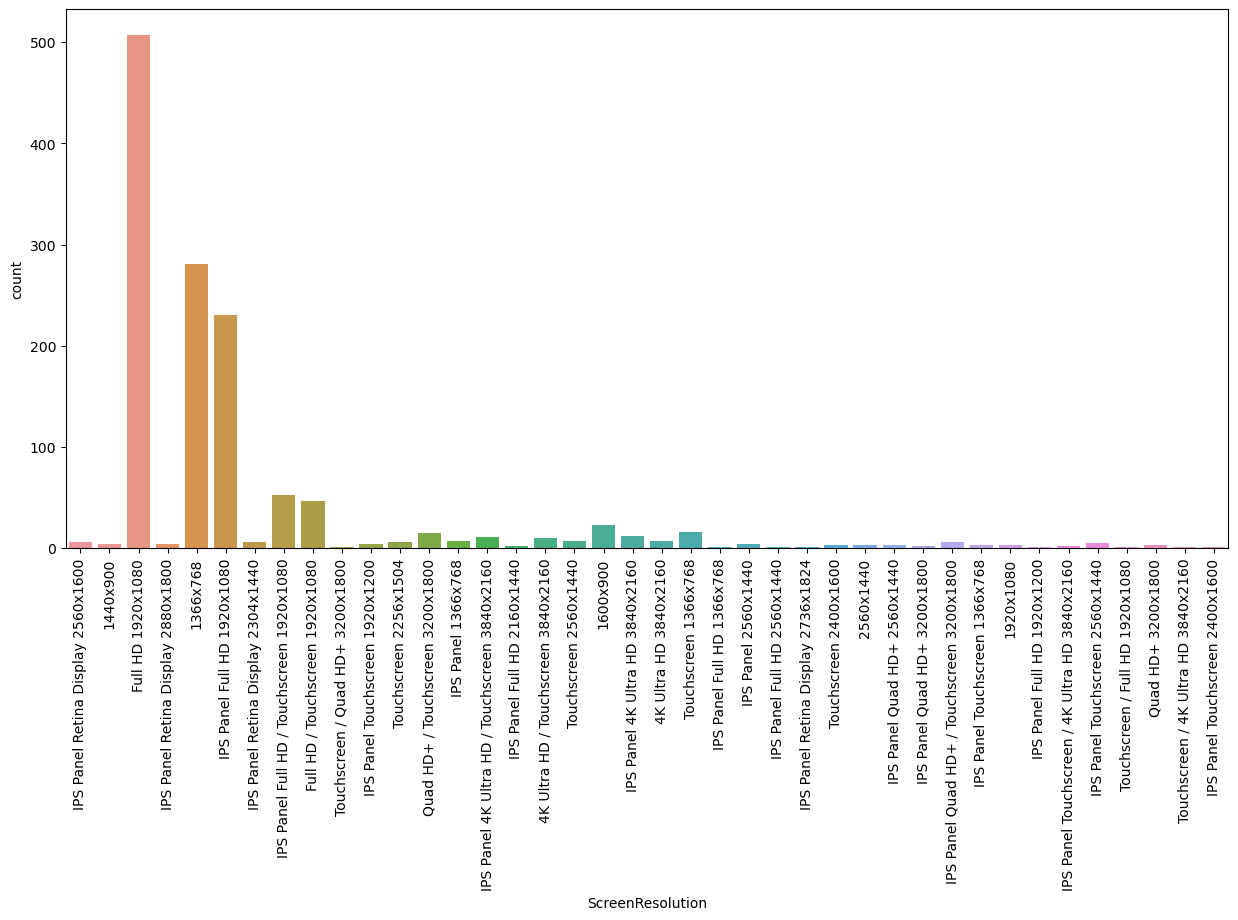

In [44]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['ScreenResolution'])
plt.xticks(rotation=90);

#### <font color=blue> Burada Cpu ayıklama işlemi yaptık

In [46]:
df2['Cpu_Numbers(GHz)']=df2['Cpu'].str.extract(r'(\d+(\.\d+)?)GHz',expand=False)[0]
df2['Cpu_Numbers(GHz)']=df2['Cpu_Numbers(GHz)'].astype(float)
df2['Cpu Name']=df2['Cpu'].str.split().str[:3].str.join('')

In [47]:
df2['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [48]:
df2['Cpu_Numbers(GHz)'].value_counts()

Cpu_Numbers(GHz)
2.50    293
2.70    166
2.80    165
1.60    134
2.30     86
2.00     86
1.80     78
2.60     76
1.10     53
2.40     52
2.90     21
3.00     19
1.20     15
1.44     12
2.20     11
1.50     10
1.30      6
3.60      5
0.90      4
3.10      3
2.10      3
1.90      2
3.20      1
1.00      1
1.92      1
Name: count, dtype: int64

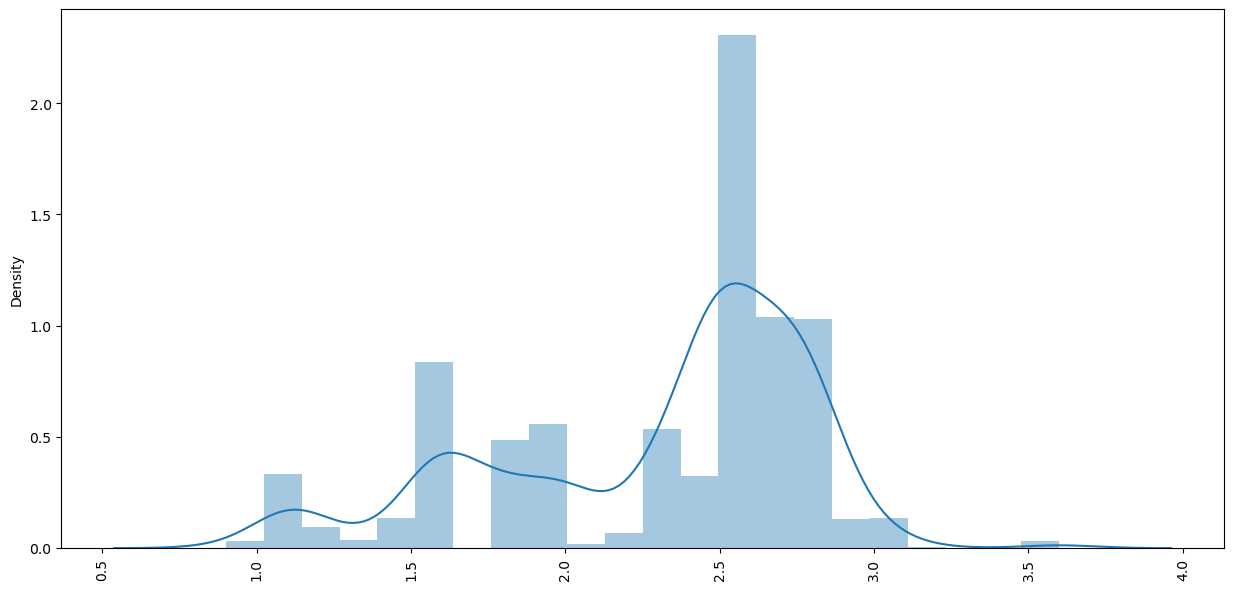

In [49]:
plt.figure(figsize=(15,7))
sns.distplot(x=df2['Cpu_Numbers(GHz)'])
plt.xticks(rotation=90);

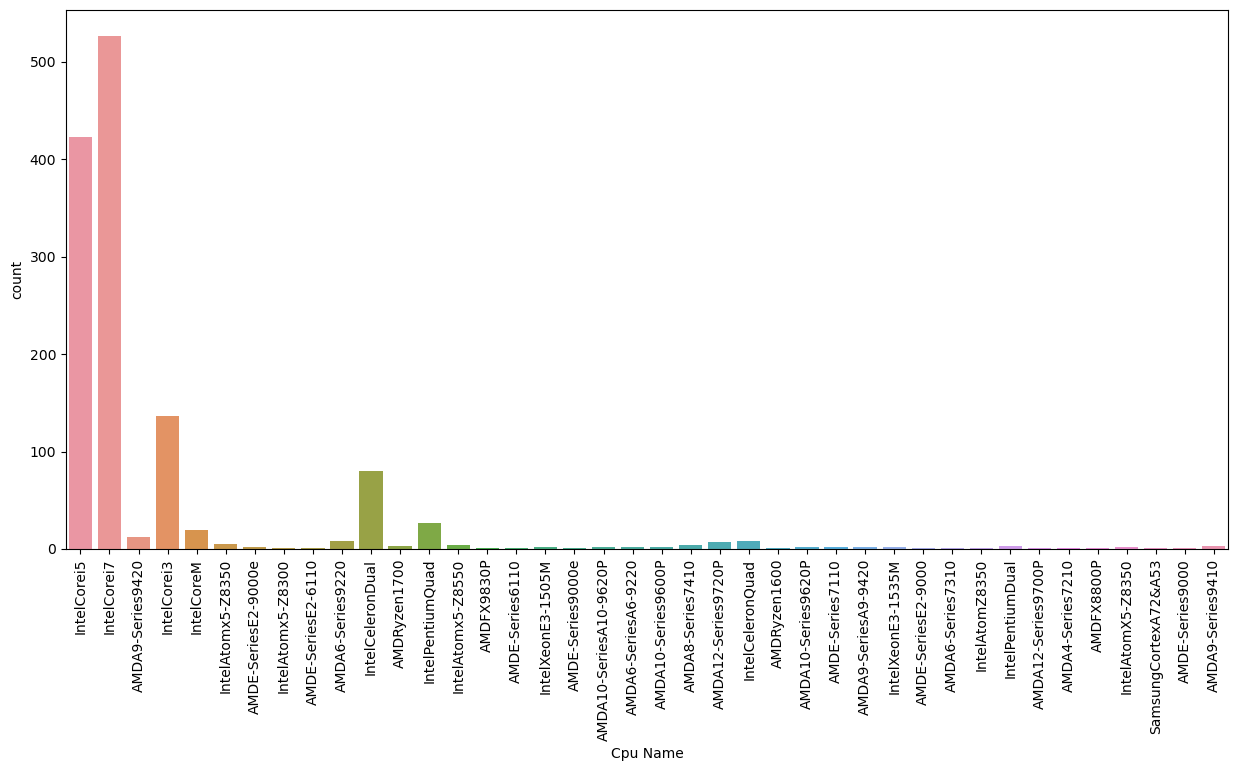

In [50]:
plt.figure(figsize=(15,7))
sns.countplot(x=df2['Cpu Name'])
plt.xticks(rotation=90);

#### <font color=blue> Burada Ram ayıklama işlemi yaptık

In [52]:
df2['Ram(GB)']=df['Ram']
df2['Ram(GB)']=df2['Ram(GB)'].str.replace('GB','')
df2=df2.drop(['Ram'],axis=1)
df2['Ram(GB)']=df2['Ram(GB)'].astype('int64')

In [53]:
df2['Ram(GB)'].value_counts()

Ram(GB)
8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64

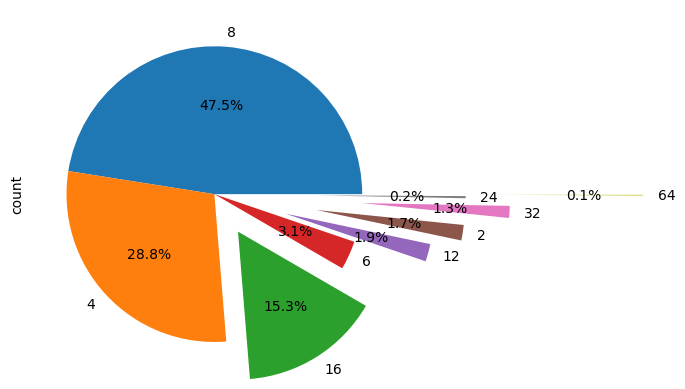

In [54]:
df2['Ram(GB)'].value_counts().plot.pie(autopct='%1.1f%%',explode=[0,0,.3,0,.5,.7,1,.7,1.9]);

#### <font color=blue> Burada Memory ayıklama işlemi yaptık

In [56]:
df2['Memory']=df2['Memory'].str.replace('.','')
df2['Memory']=df2['Memory'].str.replace('TB','000GB')
#1TB=1000GB

df2['SSD_GB']=df2['Memory'].str.extract(r'(\d+)GB SSD', expand=False)
df2['HDD_GB']=df2['Memory'].str.extract(r'(\d+)GB HDD', expand=False)
df2['Flash_Storage_GB']=df2['Memory'].str.extract(r'(\d+)GB Flash Storage', expand=False)                                    
df2['Hybrid_GB']=df2['Memory'].str.extract(r'(\d+)GB Hybrid Storage', expand=False)                                     
   
    
flash_mask=df2['Memory'].str.contains('Flash Storage')
hybrid_mask= df2['Memory'].str.contains('Hybrid')
df2['Flash_Storage_GB'][flash_mask]=df2['Memory'][flash_mask].str.extract(r'(\d+)GB Flash Storage', expand=False)
df2['Hybrid_GB'][hybrid_mask]=df2['Memory'][hybrid_mask].str.extract(r'(\d+)GB Hybrid', expand=False)


#Boş olanlar 0 ile doldurduk burada
df2['SSD_GB']=df2['SSD_GB'].fillna(0).astype(int)
df2['HDD_GB']=df2['HDD_GB'].fillna(0).astype(int)
df2['Flash_Storage_GB']=df2['Flash_Storage_GB'].fillna(0).astype(int)
df2['Hybrid_GB']=df2['Hybrid_GB'].fillna(0).astype(int)


In [57]:
df2['Memory'].value_counts()

Memory
256GB SSD                           412
1000GB HDD                          223
500GB HDD                           132
512GB SSD                           118
128GB SSD +  1000GB HDD              94
128GB SSD                            76
256GB SSD +  1000GB HDD              73
32GB Flash Storage                   38
2000GB HDD                           16
64GB Flash Storage                   15
512GB SSD +  1000GB HDD              14
1000GB SSD                           14
256GB SSD +  2000GB HDD              10
10000GB Hybrid                        9
256GB Flash Storage                   8
16GB Flash Storage                    7
32GB SSD                              6
180GB SSD                             5
128GB Flash Storage                   4
512GB SSD +  2000GB HDD               3
16GB SSD                              3
512GB Flash Storage                   2
1000GB SSD +  1000GB HDD              2
256GB SSD +  500GB HDD                2
128GB SSD +  2000GB HDD          

In [58]:
df2.info('Memory')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Memory            1303 non-null   object 
 6   Gpu               1303 non-null   object 
 7   OpSys             1303 non-null   object 
 8   Weight            1303 non-null   object 
 9   Price             1303 non-null   float64
 10  SR_Touchscreen    1303 non-null   int32  
 11  SR_IPS            1303 non-null   int32  
 12  PPI               1303 non-null   float64
 13  Cpu_Numbers(GHz)  1303 non-null   float64
 14  Cpu Name          1303 non-null   object 
 15  Ram(GB)           1303 non-null   int64  
 16  SSD_GB            1303 non-null   int32  


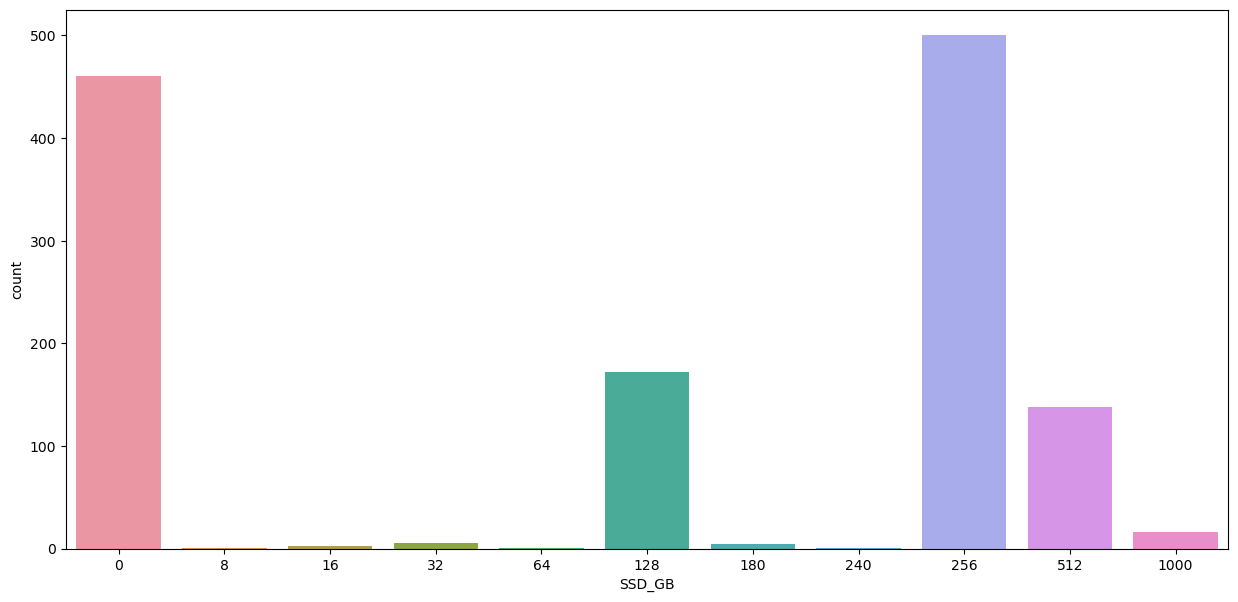

In [59]:
plt.figure(figsize=(15,7))
sns.countplot(x=df2['SSD_GB']);

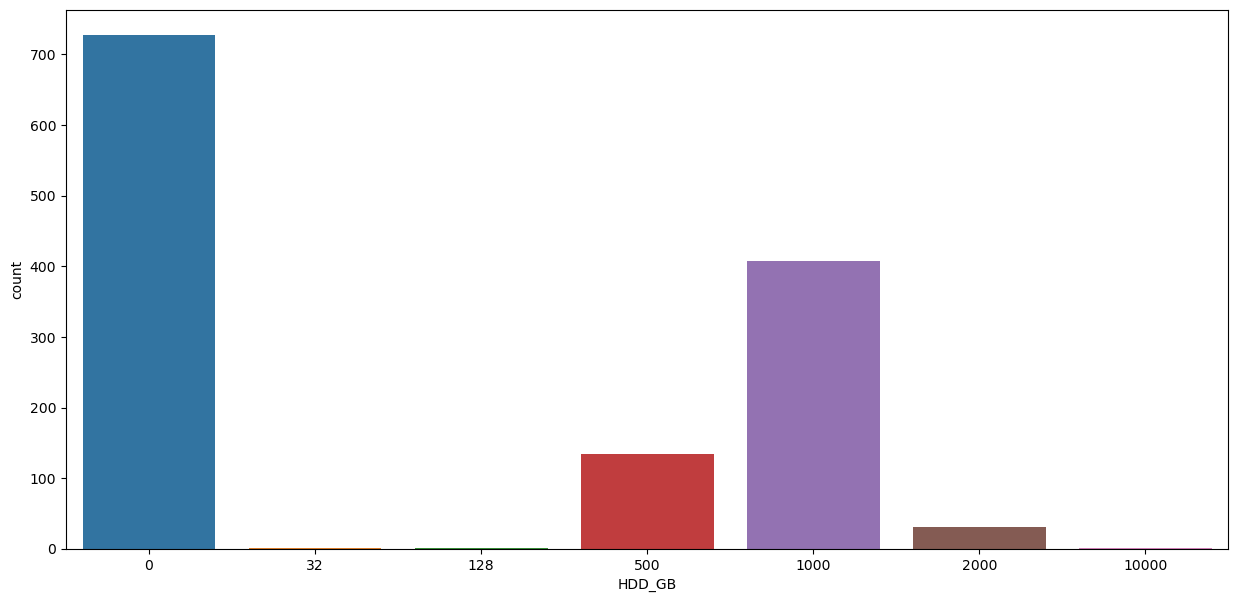

In [60]:
plt.figure(figsize=(15,7))
sns.countplot(x=df2['HDD_GB']);

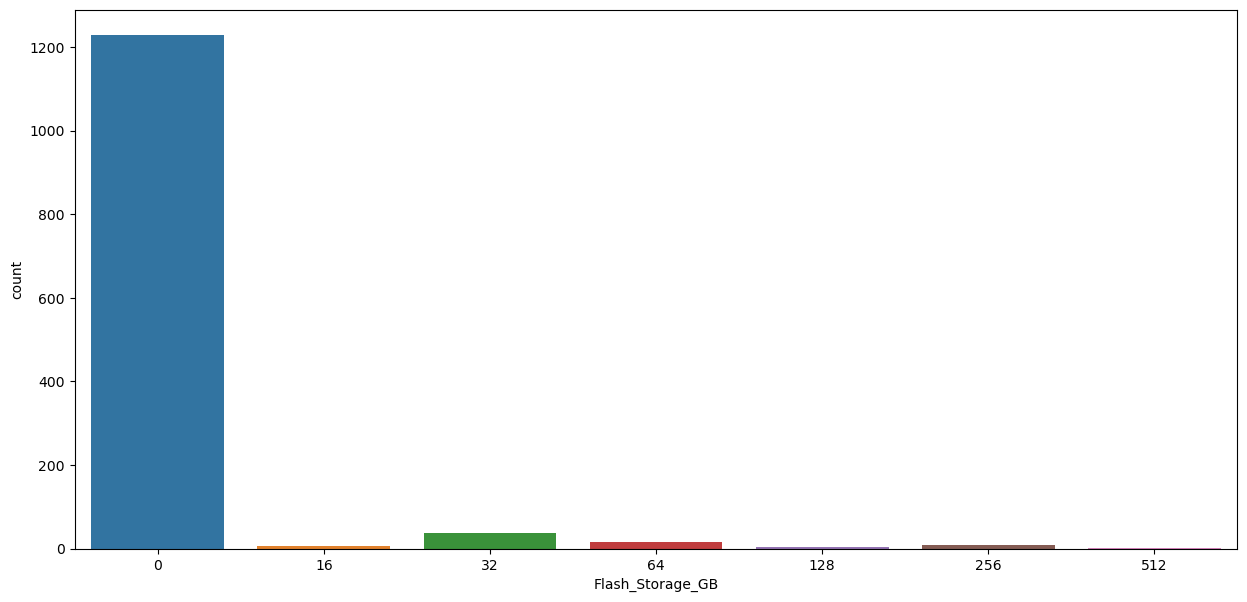

In [61]:
plt.figure(figsize=(15,7))
sns.countplot(x=df2['Flash_Storage_GB']);

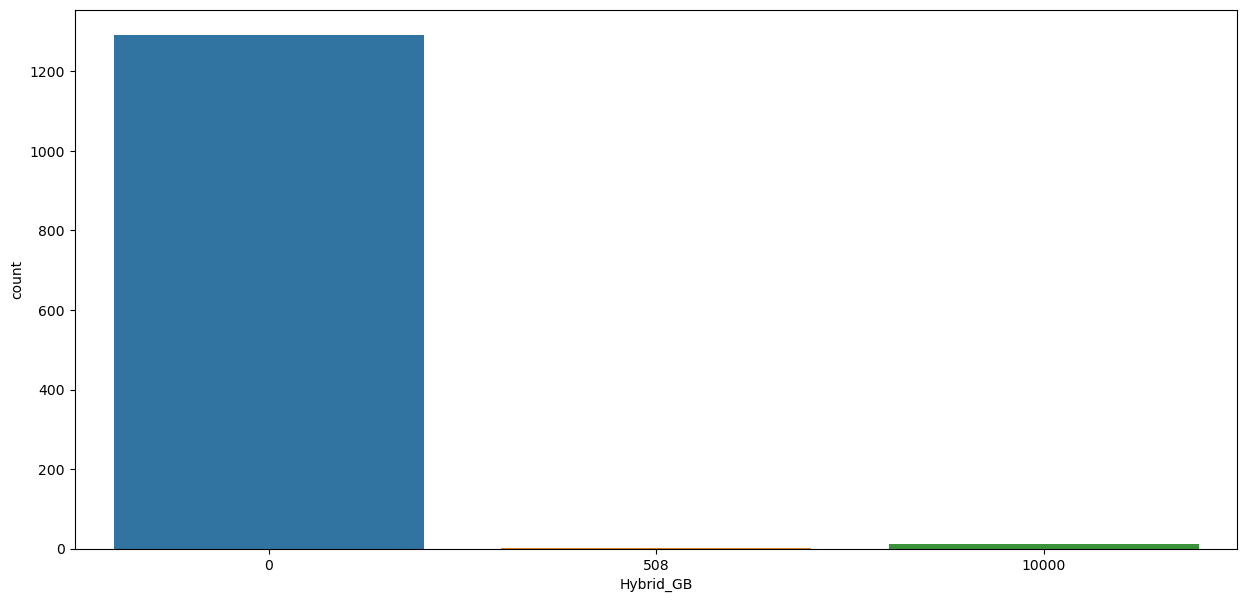

In [62]:
plt.figure(figsize=(15,7))
sns.countplot(x=df2['Hybrid_GB']);

#### <font color=blue> Burada Gpu ayıklama işlemi yaptık

In [64]:
df2['GpuTuru']=df2['Gpu'].str.split().str[0]

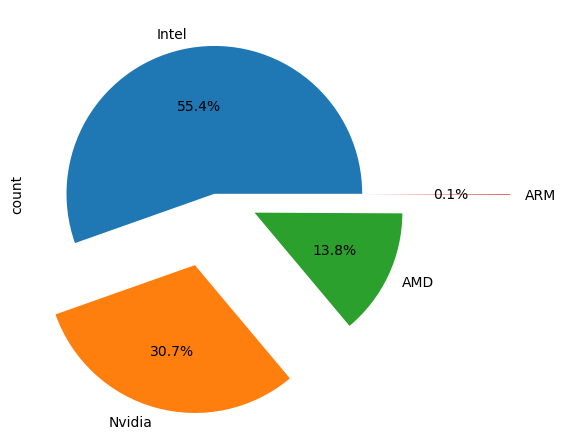

In [65]:

df2['GpuTuru'].value_counts().plot.pie(autopct='%1.1f%%',explode=[0,.5,.3,1]);

#### <font color=blue> Burada Weight ayıklama işlemi yaptık

In [67]:
df2['Weight']=df2['Weight'].str.replace('kg','')

In [68]:
df2['Weight']=df2['Weight'].astype('float64')

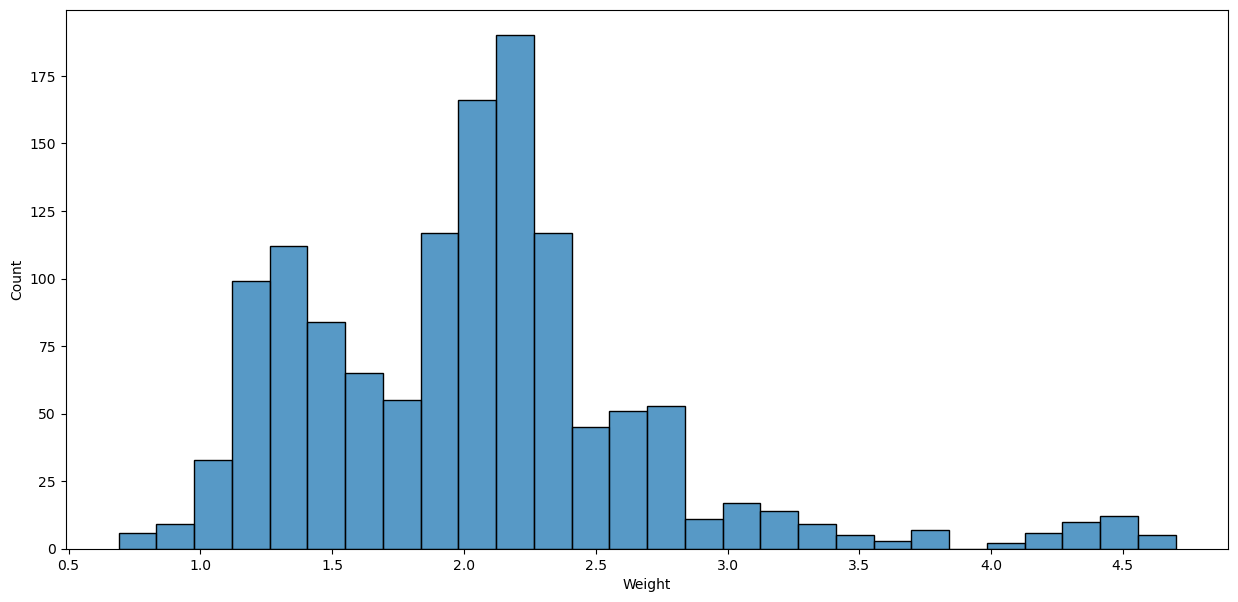

In [69]:
plt.figure(figsize=(15,7))
sns.histplot(x=df2['Weight']);

#### <font color=blue> Burada OpSys ayıklama işlemi yaptık

In [71]:
def cat_os(x):
    if x=='Windows 10' or x=='Windoxs 7' or x=='Windows 10 S':
        return 'Windows'
    
    elif x=='mac05' or x=='Mac OS X':
        return 'Mac'
    
    else:
        return'Others';

In [72]:
df2['Os']=df2['OpSys'].apply(cat_os)

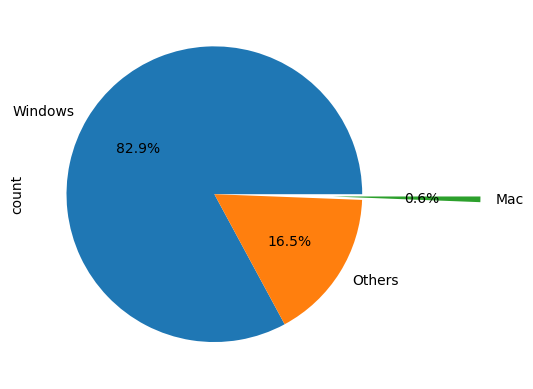

In [73]:
df2['Os'].value_counts().plot.pie(autopct='%1.1f%%',explode=[0,0,.8,]);

### <font color=red> Outlier İncelemesi

In [75]:
df2.describe()

Inches       Weight          Price  SR_Touchscreen       SR_IPS  \
count  1303.000000  1303.000000    1303.000000     1303.000000  1303.000000   
mean     15.017191     2.038734   59870.042910        0.147352     0.280123   
std       1.426304     0.665475   37243.201786        0.354593     0.449231   
min      10.100000     0.690000    9270.720000        0.000000     0.000000   
25%      14.000000     1.500000   31914.720000        0.000000     0.000000   
50%      15.600000     2.040000   52054.560000        0.000000     0.000000   
75%      15.600000     2.300000   79274.246400        0.000000     1.000000   
max      18.400000     4.700000  324954.720000        1.000000     1.000000   

               PPI  Cpu_Numbers(GHz)      Ram(GB)       SSD_GB        HDD_GB  \
count  1303.000000       1303.000000  1303.000000  1303.000000   1303.000000   
mean    146.635987          2.298772     8.382195   182.750576    419.923254   
std      43.121345          0.506340     5.084665   184.822109    578.514571   
min      90.583402          0.900000     2.000000     0.000000      0.000000   
25%     127.335675          2.000000     4.000000     0.000000      0.000000   
50%     141.211998          2.500000     8.000000   256.000000      0.000000   
75%     157.350512          2.700000     8.000000   256.000000   1000.000000   
max     352.465147          3.600000    64.000000  1000.000000  10000.000000   

       Flash_Storage_GB     Hybrid_GB  
count       1303.000000   1303.000000  
mean           4.555641     84.810437  
std           30.274090    915.343620  
min            0.000000      0.000000  
25%            0.000000      0.000000  
50%            0.000000      0.000000  
75%            0.000000      0.000000  
max          512.000000  10000.000000

##### <font color=lime> Burada SR_Touchscreen outline varmı yokmu diye baktık

In [77]:
print(0.354593*3+0.147352)
print(0.354593*3-0.147352)

1.211131
0.916427


##### <font color=lime> Burada SR_IPS outline varmı yokmu diye baktık

In [79]:
print(0.506340*3+2.298772)
print(0.506340*3-2.298772)

3.817792
-0.779752


##### <font color=lime> Burada Cpu_Numbers(GHz) outline varmı yokmu diye baktık

In [81]:
print(0.449231*3+0.280123)
print(0.449231*3-0.280123)

1.6278160000000002
1.06757


##### <font color=lime> Burada Ram(GB) outline varmı yokmu diye baktık

In [83]:
print(5.084665*3+8.382195)
print(5.084665*3-8.382195)

23.63619
6.8718


##### <font color=lime> Burada SSD_GB outline varmı yokmu diye baktık

In [85]:
print(184.822109*3+182.750576)
print(184.822109*3-182.750576)

737.2169030000001
371.71575100000007


##### <font color=lime> Burada HDD_GB outline varmı yokmu diye baktık

In [87]:
print(578.514571*3+419.923254)
print(578.514571*3-419.923254)

2155.466967
1315.620459


##### <font color=lime> Burada Flash_Storage_GB outline varmı yokmu diye baktık

In [89]:
print(30.274090*3+4.555641)
print(30.274090*3-4.555641)

95.377911
86.26662900000001


##### <font color=lime> Burada Hybrid_GB outline varmı yokmu diye baktık

In [91]:
print(915.343620*3+84.810437)
print(915.343620*3-84.810437)

2830.841297
2661.2204229999998


In [92]:
df2.corr(numeric_only=True)

Inches    Weight     Price  SR_Touchscreen    SR_IPS  \
Inches            1.000000  0.827631  0.068197       -0.361735 -0.114804   
Weight            0.827631  1.000000  0.210370       -0.294620  0.016967   
Price             0.068197  0.210370  1.000000        0.191226  0.252208   
SR_Touchscreen   -0.361735 -0.294620  0.191226        1.000000  0.150512   
SR_IPS           -0.114804  0.016967  0.252208        0.150512  1.000000   
PPI              -0.414804 -0.323240  0.473487        0.460587  0.300879   
Cpu_Numbers(GHz)  0.307870  0.320434  0.430293       -0.082579  0.063035   
Ram(GB)           0.237993  0.383874  0.743007        0.116984  0.206623   
SSD_GB           -0.108993 -0.062425  0.676202        0.254263  0.227341   
HDD_GB            0.491831  0.475871 -0.092979       -0.191417 -0.090847   
Flash_Storage_GB -0.229803 -0.179916 -0.040511       -0.019080  0.069643   
Hybrid_GB         0.057413  0.098181  0.008747       -0.038532 -0.020463   

                       PPI  Cpu_Numbers(GHz)   Ram(GB)    SSD_GB    HDD_GB  \
Inches           -0.414804          0.307870  0.237993 -0.108993  0.491831   
Weight           -0.323240          0.320434  0.383874 -0.062425  0.475871   
Price             0.473487          0.430293  0.743007  0.676202 -0.092979   
SR_Touchscreen    0.460587         -0.082579  0.116984  0.254263 -0.191417   
SR_IPS            0.300879          0.063035  0.206623  0.227341 -0.090847   
PPI               1.000000          0.043541  0.303763  0.512584 -0.274458   
Cpu_Numbers(GHz)  0.043541          1.000000  0.368000  0.261976  0.114936   
Ram(GB)           0.303763          0.368000  1.000000  0.604344  0.086099   
SSD_GB            0.512584          0.261976  0.604344  1.000000 -0.367393   
HDD_GB           -0.274458          0.114936  0.086099 -0.367393  1.000000   
Flash_Storage_GB  0.077753         -0.224134 -0.060177 -0.148908 -0.106505   
Hybrid_GB        -0.017353          0.064854  0.042202 -0.056819 -0.067306   

                  Flash_Storage_GB  Hybrid_GB  
Inches                   -0.229803   0.057413  
Weight                   -0.179916   0.098181  
Price                    -0.040511   0.008747  
SR_Touchscreen           -0.019080  -0.038532  
SR_IPS                    0.069643  -0.020463  
PPI                       0.077753  -0.017353  
Cpu_Numbers(GHz)         -0.224134   0.064854  
Ram(GB)                  -0.060177   0.042202  
SSD_GB                   -0.148908  -0.056819  
HDD_GB                   -0.106505  -0.067306  
Flash_Storage_GB          1.000000  -0.013953  
Hybrid_GB                -0.013953   1.000000

In [93]:
abs=(df2.corr(numeric_only=True)['Price'].sort_values(ascending=False));
abs

Price               1.000000
Ram(GB)             0.743007
SSD_GB              0.676202
PPI                 0.473487
Cpu_Numbers(GHz)    0.430293
SR_IPS              0.252208
Weight              0.210370
SR_Touchscreen      0.191226
Inches              0.068197
Hybrid_GB           0.008747
Flash_Storage_GB   -0.040511
HDD_GB             -0.092979
Name: Price, dtype: float64

In [94]:
z=abs

In [95]:
df2.head(5)

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu               Memory  \
0        Intel Core i5 2.3GHz            128GB SSD   
1        Intel Core i5 1.8GHz  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz            256GB SSD   
3        Intel Core i7 2.7GHz            512GB SSD   
4        Intel Core i5 3.1GHz            256GB SSD   

                            Gpu  OpSys  Weight        Price  ...         PPI  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832  ...  226.983005   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232  ...  127.677940   
2         Intel HD Graphics 620  No OS    1.86   30636.0000  ...  141.211998   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360  ...  220.534624   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080  ...  226.983005   

   Cpu_Numbers(GHz)     Cpu Name  Ram(GB) SSD_GB  HDD_GB  Flash_Storage_GB  \
0               2.3  IntelCorei5        8    128       0                 0   
1               1.8  IntelCorei5        8      0       0               128   
2               2.5  IntelCorei5        8    256       0                 0   
3               2.7  IntelCorei7       16    512       0                 0   
4               3.1  IntelCorei5        8    256       0                 0   

   Hybrid_GB  GpuTuru      Os  
0          0    Intel  Others  
1          0    Intel  Others  
2          0    Intel  Others  
3          0      AMD  Others  
4          0    Intel  Others  

[5 rows x 22 columns]

In [96]:
df2=df2.drop(['Cpu','Memory','Memory','ScreenResolution','Gpu','OpSys'],axis=1)

## Bu altdaki sunburst grafiği çalıştırmak için kuantum işlemci lazım yoksa bilgisayarı çökertir uyarıyım. Çalıştırdığım gibi ekranımı kitlendi gerçek

In [212]:
#fig=px.sunburst(df2,path=['TypeName','Inches','Company','Cpu_Numbers(GHz)','Ram(GB)','SSD_GB',
#       'GpuTuru','SR_Touchscreen','SR_IPS','PPI','Os','Weight'],values='Price')
#fig.show()

In [98]:
df2.sample(5)

Company            TypeName  Inches  Weight      Price  SR_Touchscreen  \
258      MSI              Gaming    17.3    4.14  133146.72               0   
917      MSI              Gaming    17.3    2.70   85194.72               0   
906       HP             Netbook    12.5    1.26   79014.24               0   
1058    Dell  2 in 1 Convertible    13.3    1.60   69210.72               1   
577   Lenovo              Gaming    17.3    4.60  141884.64               0   

      SR_IPS         PPI  Cpu_Numbers(GHz)     Cpu Name  Ram(GB)  SSD_GB  \
258        0  127.335675               2.8  IntelCorei7       16     512   
917        0  127.335675               2.8  IntelCorei7       16     256   
906        0  176.232574               2.7  IntelCorei7        8     512   
1058       1  165.632118               2.7  IntelCorei7       12     256   
577        1  127.335675               2.7  IntelCorei7       32     256   

      HDD_GB  Flash_Storage_GB  Hybrid_GB GpuTuru       Os  
258     1000                 0          0  Nvidia  Windows  
917     1000                 0          0  Nvidia  Windows  
906        0                 0          0   Intel  Windows  
1058       0                 0          0   Intel  Windows  
577     1000                 0          0  Nvidia  Windows

In [99]:
x=df2[['TypeName','Inches','Company','Cpu_Numbers(GHz)','Ram(GB)','SSD_GB',
       'GpuTuru','SR_Touchscreen','SR_IPS','PPI','Os','Weight']]
y=df2[['Price']]

In [100]:
x=pd.get_dummies(x,drop_first=True)

In [101]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Inches                1303 non-null   float64
 1   Cpu_Numbers(GHz)      1303 non-null   float64
 2   Ram(GB)               1303 non-null   int64  
 3   SSD_GB                1303 non-null   int32  
 4   SR_Touchscreen        1303 non-null   int32  
 5   SR_IPS                1303 non-null   int32  
 6   PPI                   1303 non-null   float64
 7   Weight                1303 non-null   float64
 8   TypeName_Gaming       1303 non-null   bool   
 9   TypeName_Netbook      1303 non-null   bool   
 10  TypeName_Notebook     1303 non-null   bool   
 11  TypeName_Ultrabook    1303 non-null   bool   
 12  TypeName_Workstation  1303 non-null   bool   
 13  Company_Apple         1303 non-null   bool   
 14  Company_Asus          1303 non-null   bool   
 15  Company_Chuwi        

In [102]:
df2=px.data.tips()
pd.DataFrame(df2)
pd.DataFrame(df2)

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [103]:
x_train,x_test,y_train,y_text=train_test_split(x,y,test_size=.20,random_state=42)

### Modelling = Modelleme

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore') 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

def algo_test(x,y):
    L=LinearRegression()
    D=DecisionTreeRegressor()
    R=RandomForestRegressor()
    A=AdaBoostRegressor()
    X=XGBRegressor()
    
    algos=[L,D,R,A,X]
    algo_names=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','AdaBoostRegressor','XGBRegressor']
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
    
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'])
    
    for algo in algos:
        p=algo.fit(x_train,y_train).predict(x_test)
        r_squared.append(r2_score(y_test, p))
        rmse.append(mean_squared_error(y_test, p)**.5)
        mae.append(mean_absolute_error(y_test, p))
    

    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae

    rtable=result.sort_values('R_Squared',ascending=False)
    return rtable

In [106]:
algo_test(x,y)

R_Squared          RMSE           MAE
4   0.850609  14676.650092   9440.019441
2   0.827299  15780.198001  10198.199452
0   0.771965  18132.840101  12994.320791
1   0.730256  19721.525572  12814.720855
3   0.665384  21965.344706  17981.296434

#### <font color=blue> Burada Coefficients ayrı Regression tanımladık

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [109]:
lr=LinearRegression()

In [110]:
model=lr.fit(x_train,y_train)

In [111]:
tahmin=model.predict(x_test)

In [112]:
mean_squared_error(y_test,tahmin)**.5

18132.84010093012

In [113]:
r2_score(y_test,tahmin)

0.7719645649687363

## Coefficients - Katsayılar

In [115]:
lr.coef_

array([[-1.12858762e+03,  9.90548152e+03,  2.50576123e+03,
         4.50333933e+01, -5.32083884e+03,  2.29128631e+03,
         1.35069543e+02,  1.18014217e+04, -1.06097449e+04,
        -1.28776737e+04, -1.74692000e+04,  7.57559982e+02,
         2.71426399e+04,  1.95719966e+04,  6.48236896e+03,
        -4.46544946e+03,  1.14363072e+04, -2.54108423e+03,
         2.71761565e+04,  1.35180759e+04, -2.03941878e+03,
         3.92701055e+04,  7.69274330e+03,  1.69046875e+04,
         1.71985959e+03,  2.35189646e+04,  4.70372102e+04,
         2.01525470e+04,  1.74235725e+04,  2.72100116e+03,
         9.95022397e+02, -1.59145135e+04,  1.08993887e+04,
         8.83382534e+03, -9.70919901e+02, -2.57390220e+02]])

In [116]:
feature_importance=pd.DataFrame({'Feature':x_train.columns,'Coefs':lr.coef_[0]})
feature_importance=feature_importance.sort_values(by='Coefs',ascending=False)
feature_importance

Feature         Coefs
26         Company_Razer  47037.210169
21            Company_LG  39270.105506
18        Company_Google  27176.156498
12  TypeName_Workstation  27142.639944
25     Company_Microsoft  23518.964630
27       Company_Samsung  20152.547024
13         Company_Apple  19571.996628
28       Company_Toshiba  17423.572524
23           Company_MSI  16904.687458
19            Company_HP  13518.075893
7                 Weight  11801.421717
16          Company_Dell  11436.307152
32         GpuTuru_Intel  10899.388667
1       Cpu_Numbers(GHz)   9905.481523
33        GpuTuru_Nvidia   8833.825337
22        Company_Lenovo   7692.743296
14          Company_Asus   6482.368957
29          Company_Vero   2721.001156
2                Ram(GB)   2505.761228
5                 SR_IPS   2291.286313
24      Company_Mediacom   1719.859587
30        Company_Xiaomi    995.022397
11    TypeName_Ultrabook    757.559982
6                    PPI    135.069543
3                 SSD_GB     45.033393
35            Os_Windows   -257.390220
34             Os_Others   -970.919901
0                 Inches  -1128.587624
20        Company_Huawei  -2039.418784
17       Company_Fujitsu  -2541.084226
15         Company_Chuwi  -4465.449461
4         SR_Touchscreen  -5320.838838
8        TypeName_Gaming -10609.744894
9       TypeName_Netbook -12877.673657
31           GpuTuru_ARM -15914.513466
10     TypeName_Notebook -17469.200018

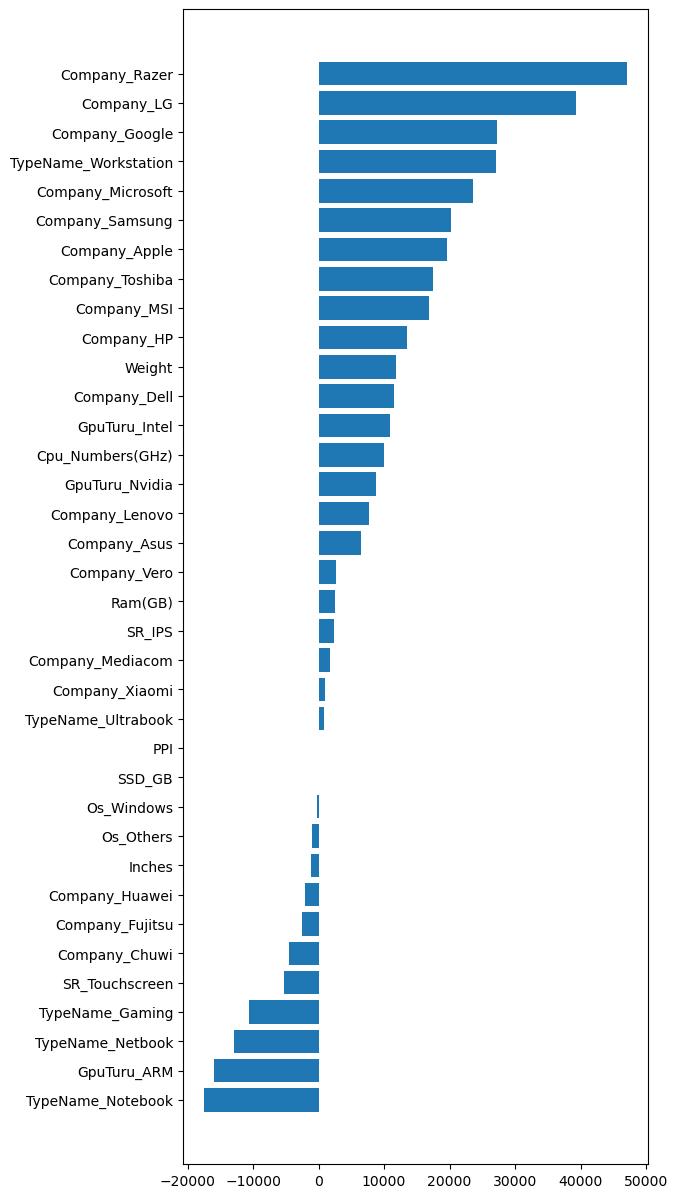

In [117]:
plt.figure(figsize=(6,15))
plt.barh(feature_importance['Feature'],feature_importance['Coefs'])
plt.gca().invert_yaxis()

### Resuduals

In [119]:
residuals=tahmin-y_test
residuals

Price
479  -26429.892205
1022  -1761.863533
298    5653.177630
1265   4819.192384
774   -5657.581010
...            ...
1058  18099.566766
199    -794.487689
297  -14492.729787
411   -7091.470967
710    -404.124021

[261 rows x 1 columns]